<a href="https://colab.research.google.com/github/Barde-S/AirQuality-in-Mexico/blob/main/AirQuallityMexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Variate Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
from IPython.display import display, clear_output
from plotly.subplots import make_subplots
import scipy.stats as stats
import ipywidgets as widgets
%matplotlib inline

In [ ]:
df = pd.read_csv('mer_imputed_merged_data.xlsx - Sheet1.csv')
df.head()

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


In [ ]:
pollutants = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']
weather_vars = ['direct_radiation (W/m²)', 'RH_MER', 'TMP_MER', 'WSP_MER']

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.describe()

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex,Month,Year,hour
count,26788,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.00000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000,26788.000000
mean,2022-06-13 12:59:53.011796224,198.299313,21.938476,39.138806,3.653750,25.629505,30.601047,0.505975,49.909788,18.849627,184.423941,2.10482,0.050246,0.284978,3.156973,6.687696,2021.934672,11.498283
min,2020-11-25 01:00:00,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.600000,0.000000,0.10000,0.000000,0.000000,1.000000,1.000000,2020.000000,0.000000
25%,2021-09-02 00:45:00,0.000000,13.000000,24.000000,1.000000,4.000000,21.000000,0.240000,34.000000,15.828906,84.000000,1.30000,0.000000,0.000000,2.000000,4.000000,2021.000000,5.000000
50%,2022-06-12 00:30:00,2.000000,20.000000,36.000000,2.000000,16.000000,29.000000,0.400000,51.000000,18.400000,170.000000,1.90000,0.000000,0.000000,3.000000,7.000000,2022.000000,11.000000
75%,2023-03-26 00:15:00,383.000000,29.000000,51.000000,4.000000,40.000000,38.000000,0.670000,67.000000,21.900000,306.000000,2.70000,0.000000,1.000000,4.000000,10.000000,2023.000000,17.000000
max,2024-01-01 00:00:00,1008.000000,186.000000,411.000000,251.000000,156.000000,132.000000,3.650000,93.000000,31.600000,360.000000,8.10000,1.000000,1.000000,5.000000,12.000000,2024.000000,23.000000
std,NaN,285.059521,12.670387,20.382502,5.767726,26.409113,13.298383,0.382489,19.936643,4.285339,115.759263,1.05181,0.218457,0.451413,1.363258,3.501357,0.879062,6.923225


In [ ]:
df.columns.tolist()

['datetime',
 'direct_radiation (W/m²)',
 'PM25_MER',
 'PM10_MER',
 'SO2_MER',
 'O3_MER',
 'NO2_MER',
 'CO_MER',
 'RH_MER',
 'TMP_MER',
 'WDR_MER',
 'WSP_MER',
 'is_festival',
 'is_weekend',
 'AirQualityIndex',
 'Month',
 'Year',
 'hour']

In [ ]:
# Dropdown widget to select air pollutant
pollutant_selector = widgets.Dropdown(
    options=pollutants,
    value='NO2_MER',  # Default value
    description='Pollutant:',
)

# Function to plot the graphs
def plot_relationship(selected_pollutant):
    plt.figure(figsize=(10, 6))
    for weather_feature in weather_vars:
        sns.lmplot(x=weather_feature, y=selected_pollutant, data=df, height=6, aspect=1.2, line_kws={'color': 'red'})
        plt.title(f'Relationship between {selected_pollutant} and {weather_feature}')
        plt.show()

# Display the dropdown and plot the graph based on selection
widgets.interactive(plot_relationship, selected_pollutant=pollutant_selector)

interactive(children=(Dropdown(description='Pollutant:', index=4, options=('PM25_MER', 'PM10_MER', 'SO2_MER', …

In [ ]:
df_monthly = df.resample('ME', on='datetime').mean()

# Create the plot
import plotly.graph_objects as go

fig = go.Figure()

# Add traces for each pollutant
for pollutant in pollutants:
    fig.add_trace(go.Scatter(
        x=df_monthly.index,  # Use aggregated datetime
        y=df_monthly[pollutant],
        mode='lines',
        name=pollutant
    ))

# Update layout for better clarity
fig.update_layout(
    title='Monthly Trends of Air Pollutants',
    xaxis_title='Date',
    yaxis_title='Concentration (µg/m³)',
    xaxis=dict(rangeslider=dict(visible=True)),  # Add a range slider for interactivity
    legend_title='Pollutants',
    template='plotly_white'
)

# Show the plot
fig.show()

In [ ]:
# Aggregate data by Month and year
monthly_country_city_summary = df.groupby(['Year', 'Month']).agg({
    'PM25_MER': 'mean',
    'PM10_MER': 'mean',
    'SO2_MER': 'mean',
    'O3_MER': 'mean',
    'NO2_MER': 'mean',
    'CO_MER': 'mean',
     'RH_MER': 'mean',
     'TMP_MER': 'mean',
     'WDR_MER': 'mean',
    'WSP_MER': 'mean'
}).reset_index()

In [ ]:
monthly_country_city_summary.sort_values(by=['Year', 'Month'])

,Year,Month,PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER
0,2020,11,32.230769,64.412587,6.386874,22.656031,42.351107,0.695416,37.748252,18.197203,201.076923,1.661538
1,2020,12,27.840991,51.447541,7.092926,21.861130,36.046434,0.528551,48.461801,16.544689,169.992661,1.824483
2,2021,1,24.658825,46.931409,4.182075,21.298539,34.404442,0.622456,46.052778,16.127639,171.918056,1.806250
3,2021,2,26.907645,55.477493,7.539760,28.646205,33.664559,0.557473,32.117560,17.698602,172.549107,2.091220
4,2021,3,28.957731,61.109585,7.064138,34.281138,30.937640,0.424223,31.948925,20.039400,172.650538,2.174731
5,2021,4,29.648958,52.855078,2.943953,38.166638,29.426852,0.449990,34.612500,20.806260,183.666667,2.282222
6,2021,5,21.815328,26.231155,2.191308,36.960966,25.003696,0.333238,47.361559,21.221560,182.563172,2.364247
7,2021,6,14.412124,17.715509,1.958681,22.430223,23.004253,0.448446,60.233333,19.471872,181.815278,2.221250
8,2021,7,19.735635,33.517739,2.120996,23.869344,26.413754,0.453854,60.133065,19.244583,205.992888,2.103870
9,2021,8,14.618756,24.754634,2.590250,21.118280,23.707941,0.407237,61.212366,18.972460,187.350162,2.214161


## Key Observations:

1. **Trends in Air Pollutants**:
   - **PM2.5 and PM10**: These particulate matters show seasonal variations, with higher values generally observed in colder months (e.g., December to February). For instance, PM2.5 peaked at 32.23 in November 2020 and dropped significantly in warmer months, reaching as low as 12.18 in September 2022.
   - **SO₂**: Sulfur dioxide values are consistently low across the dataset, with slight increases during colder months.
   - **O₃**: Ozone levels remain fairly stable but exhibit slight increases during warmer months (e.g., 38.16 in April 2021).
   - **NO₂**: Nitrogen dioxide levels are higher in colder months and decrease during summer, reflecting heating-related emissions in winter.
   - **CO**: Carbon monoxide levels remain relatively low but rise slightly in colder months.

2. **Meteorological Patterns**:
   - **Temperature (TMP)**: Consistent seasonal patterns are observed, with higher temperatures in summer months (e.g., 22.32°C in May 2022) and lower in winter (e.g., 15.80°C in January 2022).
   - **Relative Humidity (RH)**: RH is generally higher during the rainy season (e.g., July and August) and lower in colder, drier months.
   - **Wind Direction (WDR) and Speed (WSP)**: Wind direction varies significantly across months, while wind speed shows relatively minor fluctuations, with slightly higher values during summer months.

3. **Impact of Festivals and Weekends**:
   - **Festival Seasons**: Months with festivals (e.g., December and January) show slight increases in air pollutant levels like PM2.5 and CO, possibly due to heightened human activities such as transportation and festivities.

4. **Seasonal Insights**:
   - **Winter (Dec–Feb)**: High pollutant concentrations, low temperatures, and lower wind speeds contribute to poor air dispersion, leading to elevated PM2.5 and PM10 levels.
   - **Summer (May–Aug)**: Reduced pollutant levels, high temperatures, and increased wind speeds improve air quality.
   - **Transition Months (Mar, Sep, Nov)**: These months show intermediate values, with pollutants transitioning between winter highs and summer lows.

5. **Notable Anomalies**:
   - PM2.5 levels dropped significantly to 12.18 in September 2022, an unusually low value compared to the general trend.
   - CO levels peaked slightly higher than usual during some festival months, such as December 2023, possibly indicating increased combustion-related activities.


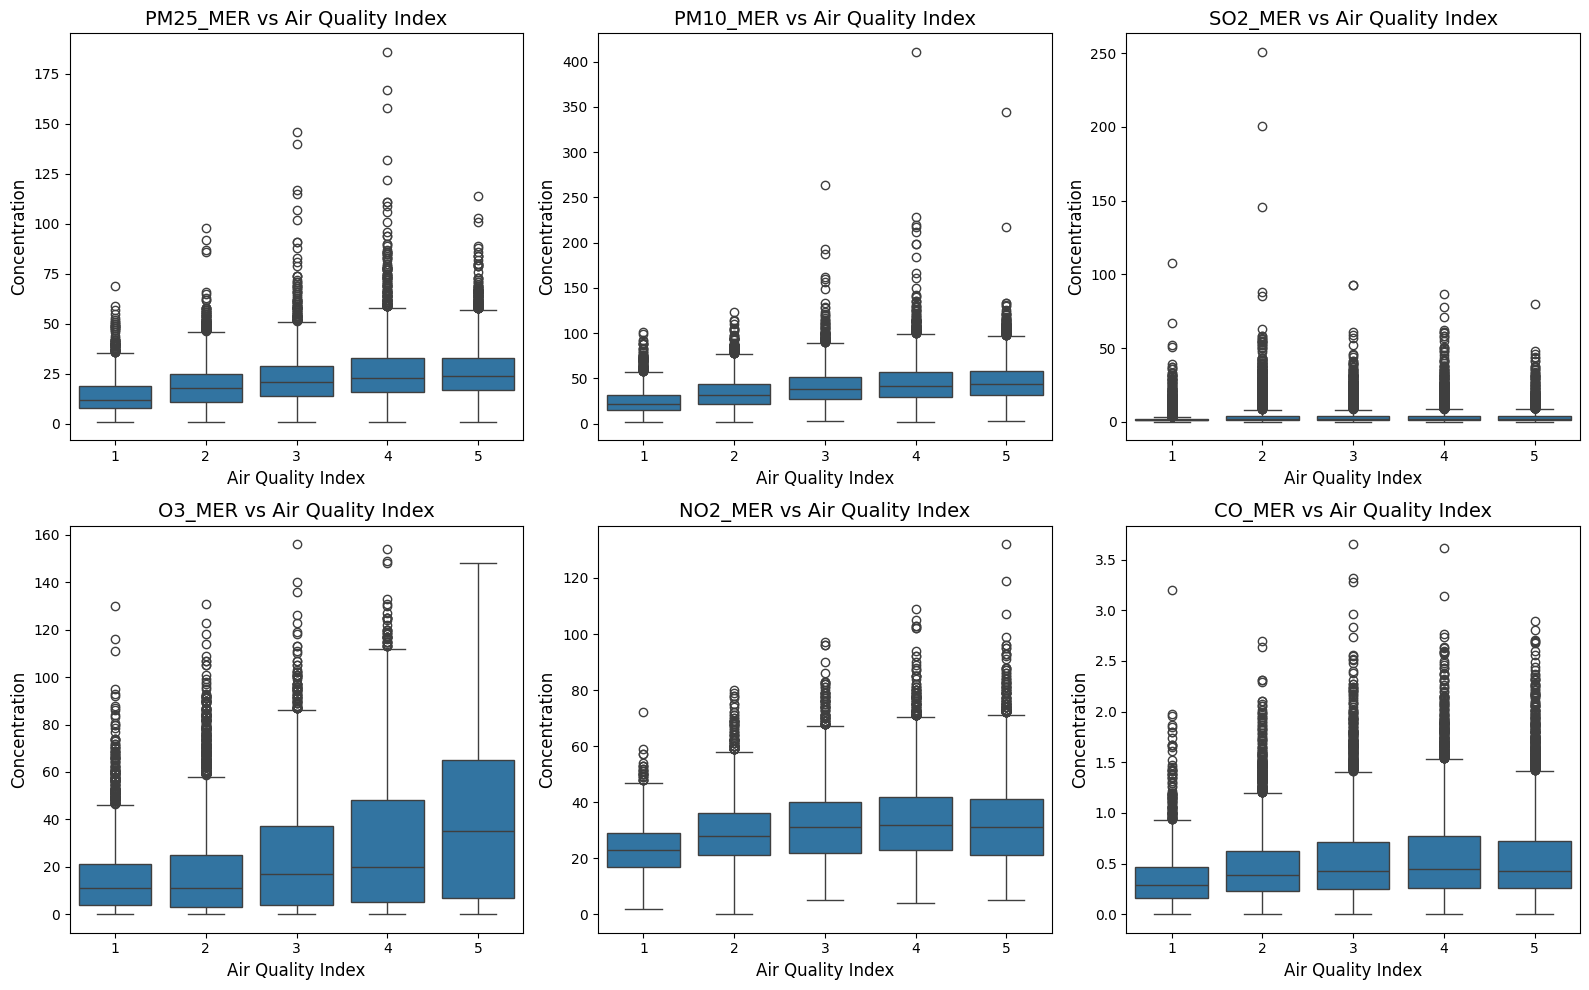

In [ ]:
plt.figure(figsize=(16, 10))

# Create box plots for each pollutant against AirQualityIndex
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
    sns.boxplot(
        x='AirQualityIndex',
        y=pollutant,
        data=df
    )
    plt.title(f'{pollutant} vs Air Quality Index', fontsize=14)
    plt.xlabel('Air Quality Index', fontsize=12)
    plt.ylabel('Concentration', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### **1. PM2.5 vs AQI**
- **Observations**:
  - PM2.5 concentrations increase progressively with higher AQI levels.
  - Median PM2.5 values are higher as AQI moves from 1 to 5, indicating a strong correlation between PM2.5 levels and worsening air quality.
  - Outliers: Extremely high PM2.5 concentrations (>150 µg/m³) are observed, especially at higher AQI levels, signaling potential pollution spikes.
- **Interpretation**: PM2.5 is a major contributor to poor air quality, with its concentration closely tied to the AQI. These particles are typically produced by combustion processes, industrial activities, and vehicular emissions.

---

#### **2. PM10 vs AQI**
- **Observations**:
  - Similar to PM2.5, PM10 concentrations increase as AQI worsens.
  - The distribution widens at higher AQI levels, showing significant variability in PM10 concentrations for poor air quality.
  - Outliers: Some PM10 values exceed 300 µg/m³, likely due to dust storms, construction activities, or other large-scale particulate emissions.
- **Interpretation**: PM10, consisting of larger particulate matter than PM2.5, also significantly impacts air quality, particularly in urban and industrial areas.

---

#### **3. SO₂ (Sulfur Dioxide) vs AQI**
- **Observations**:
  - Median SO₂ concentrations increase slightly with higher AQI levels, though the spread of values is narrow.
  - Outliers: Rare instances of high SO₂ concentrations (>100 µg/m³) are observed, likely due to industrial emissions or combustion of sulfur-containing fuels.
- **Interpretation**: While SO₂ contributes to air quality degradation, its influence appears less pronounced compared to particulate matter.

---

#### **4. O₃ (Ozone) vs AQI**
- **Observations**:
  - O₃ concentrations exhibit a wider range at higher AQI levels, with the median increasing gradually.
  - Significant outliers are observed at AQI levels 4 and 5, with values exceeding 140 µg/m³.
- **Interpretation**: Ozone, a secondary pollutant formed by reactions between nitrogen oxides (NOₓ) and volatile organic compounds (VOCs) in sunlight, plays a critical role in poor air quality, especially during warmer months.

---

#### **5. NO₂ (Nitrogen Dioxide) vs AQI**
- **Observations**:
  - A clear upward trend is visible, with NO₂ concentrations increasing as AQI worsens.
  - Median NO₂ levels rise substantially from AQI 1 to AQI 5.
  - Outliers: High concentrations of NO₂ (>120 µg/m³) at AQI levels 4 and 5 suggest localized pollution events, such as heavy traffic or industrial activity.
- **Interpretation**: NO₂ is a major urban pollutant, often linked to vehicular emissions and industrial activities. Its correlation with AQI highlights its contribution to air pollution.

---

#### **6. CO (Carbon Monoxide) vs AQI**
- **Observations**:
  - CO concentrations show a gradual increase in median values across AQI levels.
  - The spread of values widens slightly at higher AQI levels, with some outliers exceeding 3 µg/m³.
- **Interpretation**: CO, a product of incomplete combustion, is often linked to vehicular emissions and biomass burning. While its impact on AQI is evident, it appears less severe compared to particulate matter or NO₂.

---

### **General Insights**:
1. **Strong Correlation with Particulates**:
   - PM2.5 and PM10 are the dominant contributors to poor air quality, as evidenced by their strong association with higher AQI levels. These pollutants are particularly harmful due to their ability to penetrate deep into the lungs.

2. **Seasonal and Meteorological Influence**:
   - The patterns suggest that factors like weather, industrial activities, and traffic significantly influence pollutant concentrations. For instance, O₃ levels are typically higher in warmer months due to photochemical reactions.

3. **Outliers and Pollution Events**:
   - The presence of outliers across pollutants indicates episodic pollution events, such as industrial malfunctions, wildfires, or festivals.


In [ ]:
features = df.select_dtypes(include=np.number).columns

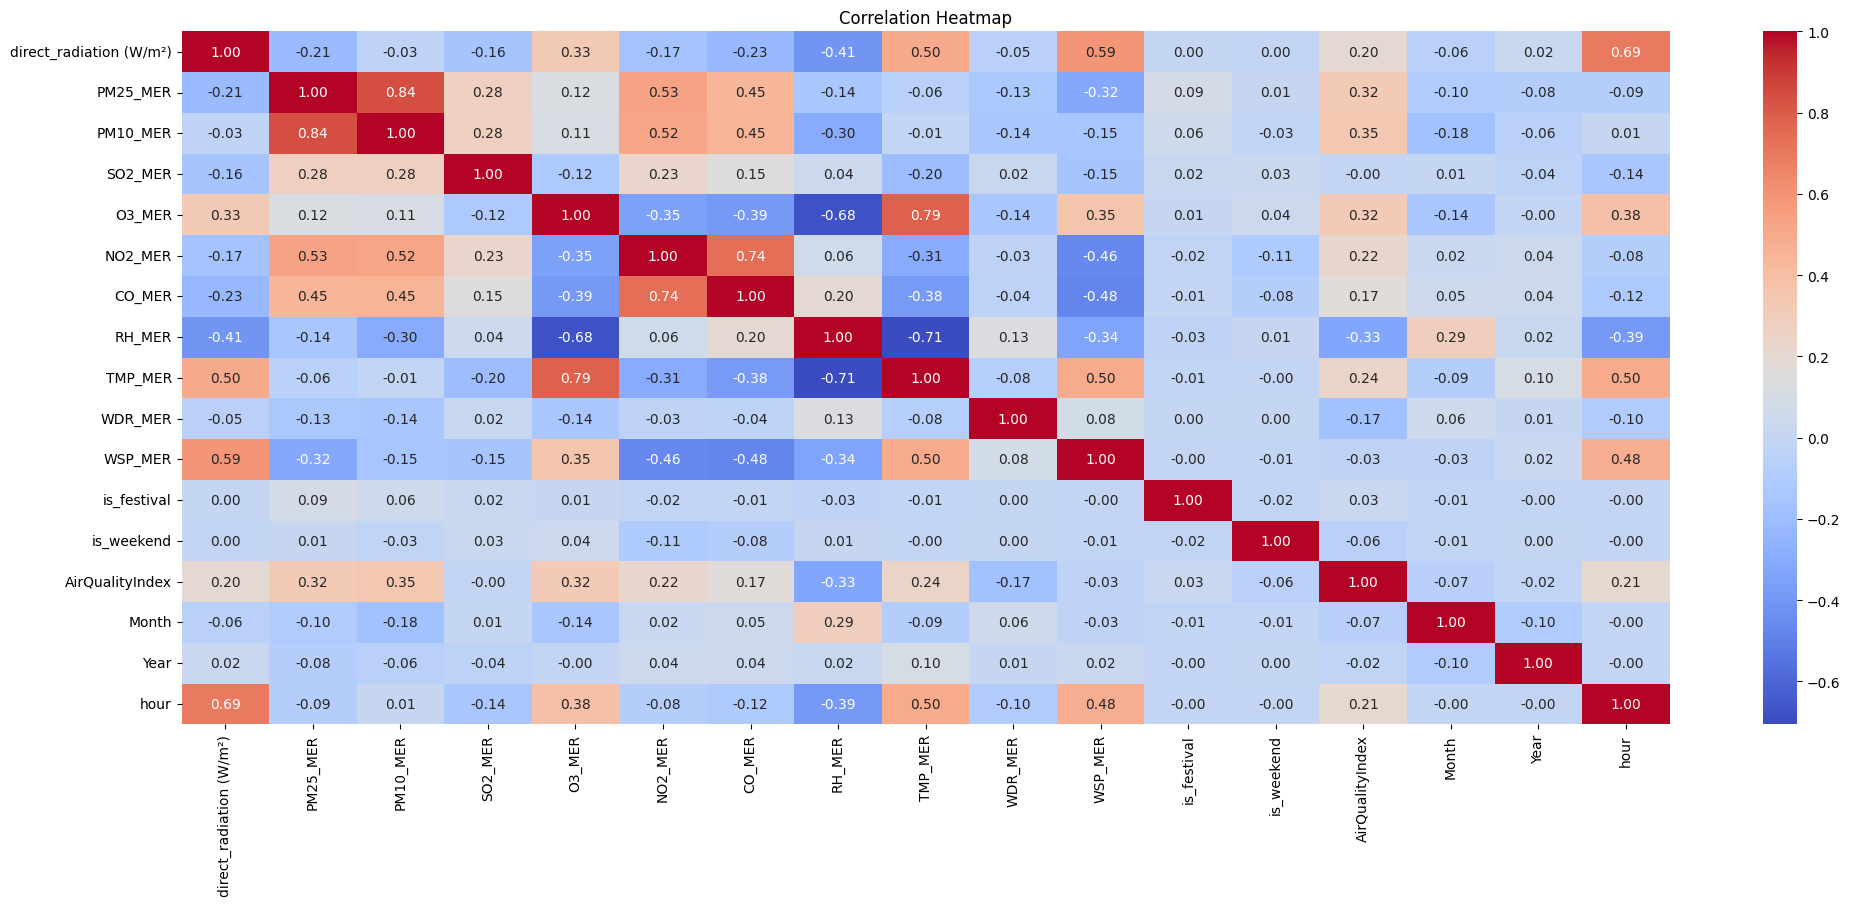

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(24, 9))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
df.columns.tolist()

['datetime',
 'direct_radiation (W/m²)',
 'PM25_MER',
 'PM10_MER',
 'SO2_MER',
 'O3_MER',
 'NO2_MER',
 'CO_MER',
 'RH_MER',
 'TMP_MER',
 'WDR_MER',
 'WSP_MER',
 'is_festival',
 'is_weekend',
 'AirQualityIndex',
 'Month',
 'Year',
 'hour']

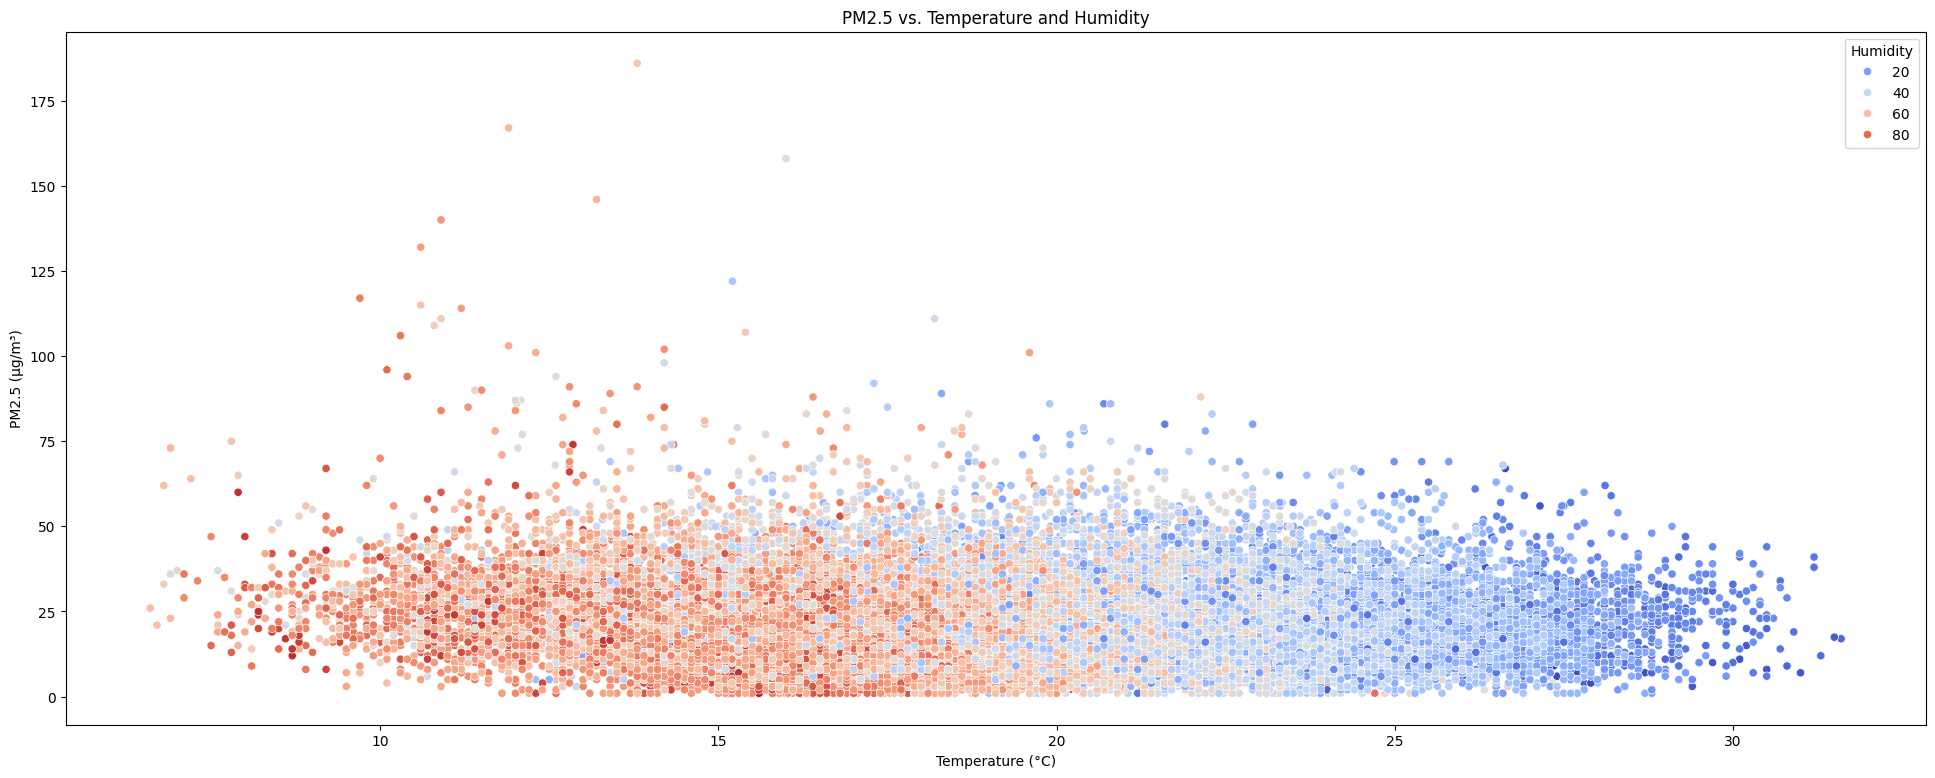

In [ ]:
# PM2.5 vs. Other Variables (Temperature and Humidity)
plt.figure(figsize=(24, 9))
sns.scatterplot(x=df['TMP_MER'], y=df['PM25_MER'],hue=df['RH_MER'], sizes=(20, 200), palette='coolwarm')
plt.title('PM2.5 vs. Temperature and Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend(title='Humidity')
plt.show()

## Observations:
1. **Temperature vs. PM2.5 Levels**:
   - As the temperature increases, the PM2.5 concentration tends to remain lower, though there is significant spread in the data.
   - At lower temperatures (e.g., <15°C), PM2.5 concentrations are more variable, with higher instances of elevated PM2.5 levels.

2. **Humidity Influence**:
   - The blue points (lower humidity) are more concentrated on the right side of the plot, corresponding to higher temperatures and generally lower PM2.5 levels.
   - The red points (higher humidity) dominate the lower temperature range and often show higher PM2.5 levels.


3. **High PM2.5 Outliers**:
   - A few points in the plot indicate extreme PM2.5 levels (>125 µg/m³), typically occurring at lower temperatures and higher humidity.

### Insights:
- Higher humidity levels seem to correlate with higher PM2.5 levels, especially in colder temperatures.
- As the temperature rises, humidity decreases, and PM2.5 levels stabilize at lower concentrations.
- The combination of cold temperatures and high humidity appears to be associated with worse air quality (elevated PM2.5 levels).

This analysis suggests that environmental conditions, particularly temperature and humidity, play a role in PM2.5 concentrations and could help identify conditions prone to poor air quality.

In [ ]:
def calculate_correlations(variables):
    corr_matrix = df[variables].corr()
    return corr_matrix
calculate_correlations(df.select_dtypes(include=np.number).columns)

,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex,Month,Year,hour
direct_radiation (W/m²),1.000000,-0.213236,-0.032417,-0.156977,0.328124,-0.170886,-0.227457,-0.408319,0.500437,-0.054453,0.592328,0.004368,0.000250,0.196357,-0.061212,0.022139,0.694154
PM25_MER,-0.213236,1.000000,0.844049,0.281324,0.124585,0.528116,0.445188,-0.138894,-0.060039,-0.130479,-0.315345,0.090796,0.007397,0.323966,-0.101830,-0.081414,-0.085628
PM10_MER,-0.032417,0.844049,1.000000,0.280859,0.111093,0.522798,0.447723,-0.299566,-0.012220,-0.139613,-0.152641,0.055821,-0.025079,0.346763,-0.175019,-0.060641,0.010077
SO2_MER,-0.156977,0.281324,0.280859,1.000000,-0.123645,0.231923,0.154647,0.038993,-0.204879,0.019106,-0.154569,0.016115,0.027317,-0.000045,0.005837,-0.041870,-0.139155
O3_MER,0.328124,0.124585,0.111093,-0.123645,1.000000,-0.354604,-0.388081,-0.684887,0.786092,-0.143768,0.354270,0.012080,0.036606,0.321951,-0.139593,-0.000456,0.381273
NO2_MER,-0.170886,0.528116,0.522798,0.231923,-0.354604,1.000000,0.737622,0.063750,-0.305914,-0.033503,-0.464515,-0.016875,-0.109137,0.224374,0.024884,0.036832,-0.080940
CO_MER,-0.227457,0.445188,0.447723,0.154647,-0.388081,0.737622,1.000000,0.196422,-0.381107,-0.042084,-0.476523,-0.006132,-0.084885,0.168389,0.046316,0.040330,-0.116283
RH_MER,-0.408319,-0.138894,-0.299566,0.038993,-0.684887,0.063750,0.196422,1.000000,-0.705835,0.131096,-0.337953,-0.030502,0.008039,-0.330809,0.291212,0.019725,-0.388224
TMP_MER,0.500437,-0.060039,-0.012220,-0.204879,0.786092,-0.305914,-0.381107,-0.705835,1.000000,-0.078225,0.495974,-0.010463,-0.003558,0.243334,-0.085910,0.102475,0.496254
WDR_MER,-0.054453,-0.130479,-0.139613,0.019106,-0.143768,-0.033503,-0.042084,0.131096,-0.078225,1.000000,0.077039,0.003860,0.004514,-0.173691,0.055560,0.013168,-0.104505


In [ ]:
def analyze_temporal_patterns():
    hourly_aqi = df.groupby('hour')['AirQualityIndex'].mean()
    seasonal_aqi = df.groupby('Month')['AirQualityIndex'].mean()
    weekend_effect = df.groupby('is_weekend')['AirQualityIndex'].mean()
    festival_effect = df.groupby('is_festival')['AirQualityIndex'].mean()
    return hourly_aqi, seasonal_aqi, weekend_effect, festival_effect


hourly_aqi, monthly_aqi, weekend_effect, festival_effect = analyze_temporal_patterns()


In [ ]:
festival_effect

,AirQualityIndex
is_festival,
0,3.148652
1,3.314264


In [ ]:
weekend_effect

,AirQualityIndex
is_weekend,
0,3.206798
1,3.031962


In [ ]:
monthly_aqi

,AirQualityIndex
Month,
1,3.575744
2,3.514403
3,3.396057
4,3.414794
5,3.162634
6,2.593056
7,2.915751
8,2.879032
9,2.497222


In [ ]:
hourly_aqi

,AirQualityIndex
hour,
0,2.544643
1,2.456989
2,2.534050
3,2.549283
4,2.755376
5,2.922043
6,2.899642
7,2.876344
8,2.905914


In [ ]:
new_poll =['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'AirQualityIndex']
pollutant_dropdown = widgets.Dropdown(
    options=new_poll,
    value='AirQualityIndex',
    description='Pollutant:',
    style={'description_width': 'initial'}
)

def create_figure(selected_pollutant):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            f'Hourly {selected_pollutant} Patterns',
            f'Monthly {selected_pollutant} Patterns',
            'Weekend Effect',
            'Festival Effect'
        )
    )

    # Hourly patterns
    hourly_data = df.groupby('hour')[selected_pollutant].mean()
    fig.add_trace(
        go.Scatter(
            x=hourly_data.index,
            y=hourly_data.values,
            mode='lines+markers',
            name=f'Hourly {selected_pollutant}'
        ),
        row=1, col=1
    )

    # Monthly patterns
    monthly_data = df.groupby('Month')[selected_pollutant].mean()
    fig.add_trace(
        go.Bar(
            x=['Winter', 'Spring', 'Summer', 'Fall'],
            y=monthly_data.values,
            name=f'Monthly {selected_pollutant}'
        ),
        row=1, col=2
    )

    # Weekend effect
    weekend_data = df.groupby('is_weekend')[selected_pollutant].mean()
    fig.add_trace(
        go.Bar(
            x=['Weekday', 'Weekend'],
            y=weekend_data.values,
            name=f'Weekend {selected_pollutant}'
        ),
        row=2, col=1
    )

    # Festival effect
    festival_data = df.groupby('is_festival')[selected_pollutant].mean()
    fig.add_trace(
        go.Bar(
            x=['Non-Festival', 'Festival'],
            y=festival_data.values,
            name=f'Festival {selected_pollutant}'
        ),
        row=2, col=2
    )

    fig.update_layout(
        height=800,
        width=1200,
        showlegend=False,
        title_text=f"Temporal Patterns in {selected_pollutant}"
    )
    return fig

# Function to update the plot
def update_plot(change):
    selected_pollutant = change['new']
    fig = create_figure(selected_pollutant)
    fig.show()

# Attach the update function
pollutant_dropdown.observe(update_plot, names='value')

# Display the widget
display(pollutant_dropdown)

# Initial plot display
initial_fig = create_figure(pollutant_dropdown.value)
initial_fig.show()

Dropdown(description='Pollutant:', index=6, options=('PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', '…


Summer (Rank 1):
- Average AQI: 2.80
- AQI Range: 1.00 - 5.00
- Primary Pollutants: 
  * PM2.5: 16.80
  * PM10: 28.49
  * O3: 24.69
  * NO2: 25.92


Fall (Rank 2):
- Average AQI: 2.92
- AQI Range: 1.00 - 5.00
- Primary Pollutants: 
  * PM2.5: 19.07
  * PM10: 32.60
  * O3: 20.91
  * NO2: 29.57


Spring (Rank 3):
- Average AQI: 3.32
- AQI Range: 1.00 - 5.00
- Primary Pollutants: 
  * PM2.5: 25.53
  * PM10: 46.40
  * O3: 35.36
  * NO2: 30.38


Winter (Rank 4):
- Average AQI: 3.57
- AQI Range: 1.00 - 5.00
- Primary Pollutants: 
  * PM2.5: 26.15
  * PM10: 48.61
  * O3: 21.81
  * NO2: 36.23



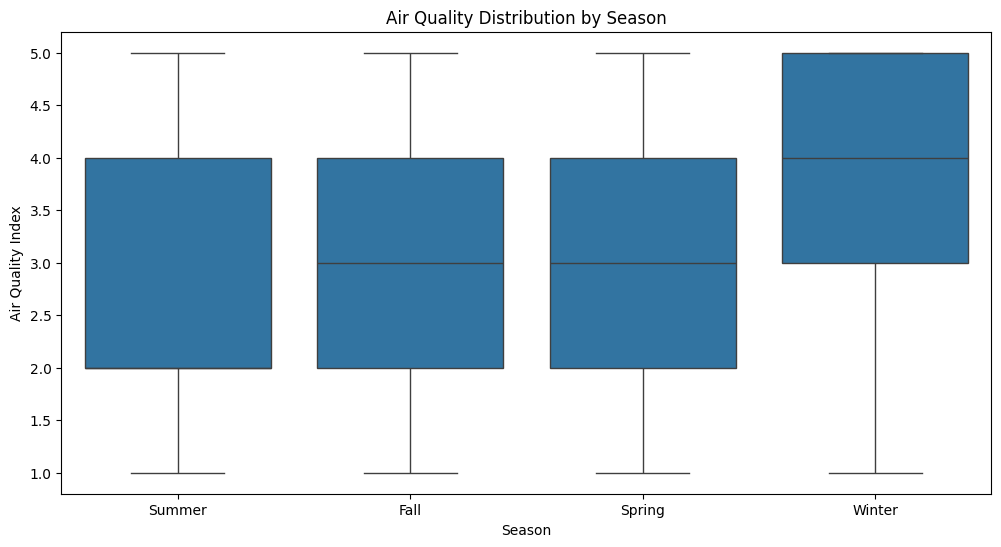

In [ ]:
def analyze_seasonal_air_quality(df):
    """
    Analyze and rank air quality across seasons
    """
    # Create season mapping
    season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                     3: 'Spring', 4: 'Spring', 5: 'Spring',
                     6: 'Summer', 7: 'Summer', 8: 'Summer',
                     9: 'Fall', 10: 'Fall', 11: 'Fall'}

    # Add season column
    df['season'] = pd.to_datetime(df['datetime']).dt.month.map(season_mapping)

    # Calculate seasonal metrics
    seasonal_metrics = pd.DataFrame()

    # Calculate various air quality metrics by season
    seasonal_metrics = df.groupby('season').agg({
        'AirQualityIndex': ['mean', 'median', 'std', 'min', 'max'],
        'PM25_MER': 'mean',
        'PM10_MER': 'mean',
        'SO2_MER': 'mean',
        'O3_MER': 'mean',
        'NO2_MER': 'mean',
        'CO_MER': 'mean'
    }).round(2)

    # Flatten column names
    seasonal_metrics.columns = ['_'.join(col).strip() for col in seasonal_metrics.columns.values]

    # Calculate overall rank (based on mean AQI, lower is better)
    seasonal_metrics['overall_rank'] = seasonal_metrics['AirQualityIndex_mean'].rank()

    # Sort by mean AQI
    seasonal_metrics = seasonal_metrics.sort_values('AirQualityIndex_mean')

    return seasonal_metrics

def create_seasonal_visualizations(df, seasonal_metrics):
    """
    Create visualizations for seasonal air quality analysis
    """
    # 1. Season Ranking Box Plot
    fig1 = plt.figure(figsize=(12, 6))
    sns.boxplot(x='season', y='AirQualityIndex', data=df,
                order=seasonal_metrics.index)
    plt.title('Air Quality Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Air Quality Index')

    # 2. Create detailed pollutant comparison
    fig2 = make_subplots(rows=2, cols=1,
                        subplot_titles=('Average AQI by Season',
                                      'Pollutant Levels by Season'))

    # Add AQI bar chart
    fig2.add_trace(
        go.Bar(x=seasonal_metrics.index,
               y=seasonal_metrics['AirQualityIndex_mean'],
               name='Average AQI',
               text=seasonal_metrics['overall_rank'].astype(int).astype(str),
               textposition='outside'),
        row=1, col=1
    )

    # Add pollutant lines
    pollutants = ['PM25_MER', 'PM10_MER', 'SO2_MER',
                  'O3_MER', 'NO2_MER', 'CO_MER']

    for pollutant in pollutants:
        fig2.add_trace(
            go.Scatter(x=seasonal_metrics.index,
                      y=seasonal_metrics[f'{pollutant}_mean'],
                      name=pollutant,
                      mode='lines+markers'),
            row=2, col=1
        )

    fig2.update_layout(height=800, width=1000,
                      title_text="Seasonal Air Quality Analysis",
                      showlegend=True)

    return fig1, fig2

def generate_seasonal_summary(seasonal_metrics):
    """
    Generate a detailed summary of seasonal air quality rankings
    """
    # Sort by AQI mean for ranking
    ranked_seasons = seasonal_metrics.sort_values('AirQualityIndex_mean')

    summary = []
    for season in ranked_seasons.index:
        metrics = ranked_seasons.loc[season]
        summary.append(f"""
{season} (Rank {int(metrics['overall_rank'])}):
- Average AQI: {metrics['AirQualityIndex_mean']:.2f}
- AQI Range: {metrics['AirQualityIndex_min']:.2f} - {metrics['AirQualityIndex_max']:.2f}
- Primary Pollutants:
  * PM2.5: {metrics['PM25_MER_mean']:.2f}
  * PM10: {metrics['PM10_MER_mean']:.2f}
  * O3: {metrics['O3_MER_mean']:.2f}
  * NO2: {metrics['NO2_MER_mean']:.2f}
""")

    return '\n'.join(summary)

seasonal_metrics = analyze_seasonal_air_quality(df)
fig1, fig2 = create_seasonal_visualizations(df, seasonal_metrics)
summary = generate_seasonal_summary(seasonal_metrics)
fig1.show()
fig2.show()
print(summary)

In [ ]:
# Function to create temporal patterns plot
def create_temporal_patterns_plot(df):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Hourly AQI Patterns',
                        'Monthly AQI Patterns',
                        'Weekend Effect',
                        'Festival Effect')
    )

    hourly_aqi = df.groupby('hour')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Scatter(x=hourly_aqi.index,
                   y=hourly_aqi.values,
                   mode='lines+markers'),
        row=1, col=1
    )

    seasonal_aqi = df.groupby('Month')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Bar(x=['Summer', 'Fall', 'Winter', 'Spring', ],
               y=seasonal_aqi.values),
        row=1, col=2
    )

    weekend_aqi = df.groupby('is_weekend')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Bar(x=['Weekday', 'Weekend'],
               y=weekend_aqi.values),
        row=2, col=1
    )

    festival_aqi = df.groupby('is_festival')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Bar(x=['Non-Festival', 'Festival'],
               y=festival_aqi.values),
        row=2, col=2
    )

    fig.update_layout(height=800,
                      width=1200,
                      showlegend=False,
                      title_text="Temporal Patterns in Air Quality")
    return fig

# Function to create pollutant relationships plot
def create_pollutant_relationships_plot(df):
    fig = px.scatter_matrix(
        df,
        dimensions=['PM25_MER', 'PM10_MER', 'SO2_MER',
                    'O3_MER', 'NO2_MER', 'CO_MER'],
        color='AirQualityIndex',
        title="Relationships Between Different Pollutants"
    )
    fig.update_layout(height=1000, width=1000)
    return fig



In [ ]:
create_temporal_patterns_plot(df)

In [ ]:
create_pollutant_relationships_plot(df)

### **General Overview**
- The plot showcases pairwise relationships between various air pollutants:
  - **PM2.5_MER**, **PM10_MER**, **SO2_MER**, **O3_MER**, **NO2_MER**, and **CO_MER**.
- **Air Quality Index (AQI)** is represented as the color gradient of the points in the scatterplots.
  - Yellow indicates higher AQI (poorer air quality).
  - Purple represents lower AQI (better air quality).


---

### **Key Observations**

1. **Positive Correlations Between Pollutants**:
   - A clear positive relationship exists between pollutants such as:
     - **PM2.5_MER** and **PM10_MER**: Higher PM2.5 levels are often associated with higher PM10 levels, which makes sense as these pollutants are closely related (both are particulate matter).
     - **NO2_MER** and **PM2.5_MER**: Urban areas with high vehicular emissions and industrial activities likely exhibit higher levels of both pollutants.
   - These correlations suggest that emissions from similar sources or atmospheric conditions drive these pollutants together.

2. **Weak or Non-Linear Relationships**:
   - Some relationships appear non-linear or weak, such as between **CO_MER** and **O3_MER**, or **SO2_MER** and **CO_MER**.
   - This might be because these pollutants originate from different sources or are influenced by unique atmospheric processes.

3. **Air Quality Index (Color Gradient)**:
   - Higher AQI values (yellow) cluster in regions where pollutant concentrations are higher, particularly for:
     - **PM2.5_MER**, **PM10_MER**, and **NO2_MER**.
   - The AQI scale validates that particulate matter (PM2.5, PM10) and nitrogen dioxide (NO2) significantly impact air quality deterioration.

---

### **Potential Interpretations**

1. **Pollutants with Common Sources**:
   - The strong positive correlations between **PM2.5_MER**, **PM10_MER**, and **NO2_MER** indicate that these pollutants likely share common sources, such as:
     - Vehicular emissions.
     - Industrial activities.
     - Combustion of fossil fuels.

2. **Secondary Pollutants**:
   - **O3_MER** (ozone) exhibits weaker relationships with other pollutants. This could be because ozone is a secondary pollutant formed through chemical reactions between NOx and volatile organic compounds (VOCs) under sunlight. Its concentration depends on factors like temperature and solar radiation rather than direct emissions.

3. **Localized vs. Regional Pollutants**:
   - **CO_MER** (carbon monoxide) displays weaker correlations with other pollutants, indicating that its concentration may be more localized (e.g., near traffic hotspots).
   - On the other hand, **PM2.5_MER** and **PM10_MER** are regional pollutants, traveling longer distances and showing broader correlations with other pollutants.

4. **Impact on Air Quality Index (AQI)**:
   - The AQI gradient emphasizes the role of **PM2.5_MER**, **PM10_MER**, and **NO2_MER** in determining poor air quality (high AQI values). Policies targeting these pollutants can significantly improve air quality.
 mitigate **O3_MER** formation, especially during warmer months.


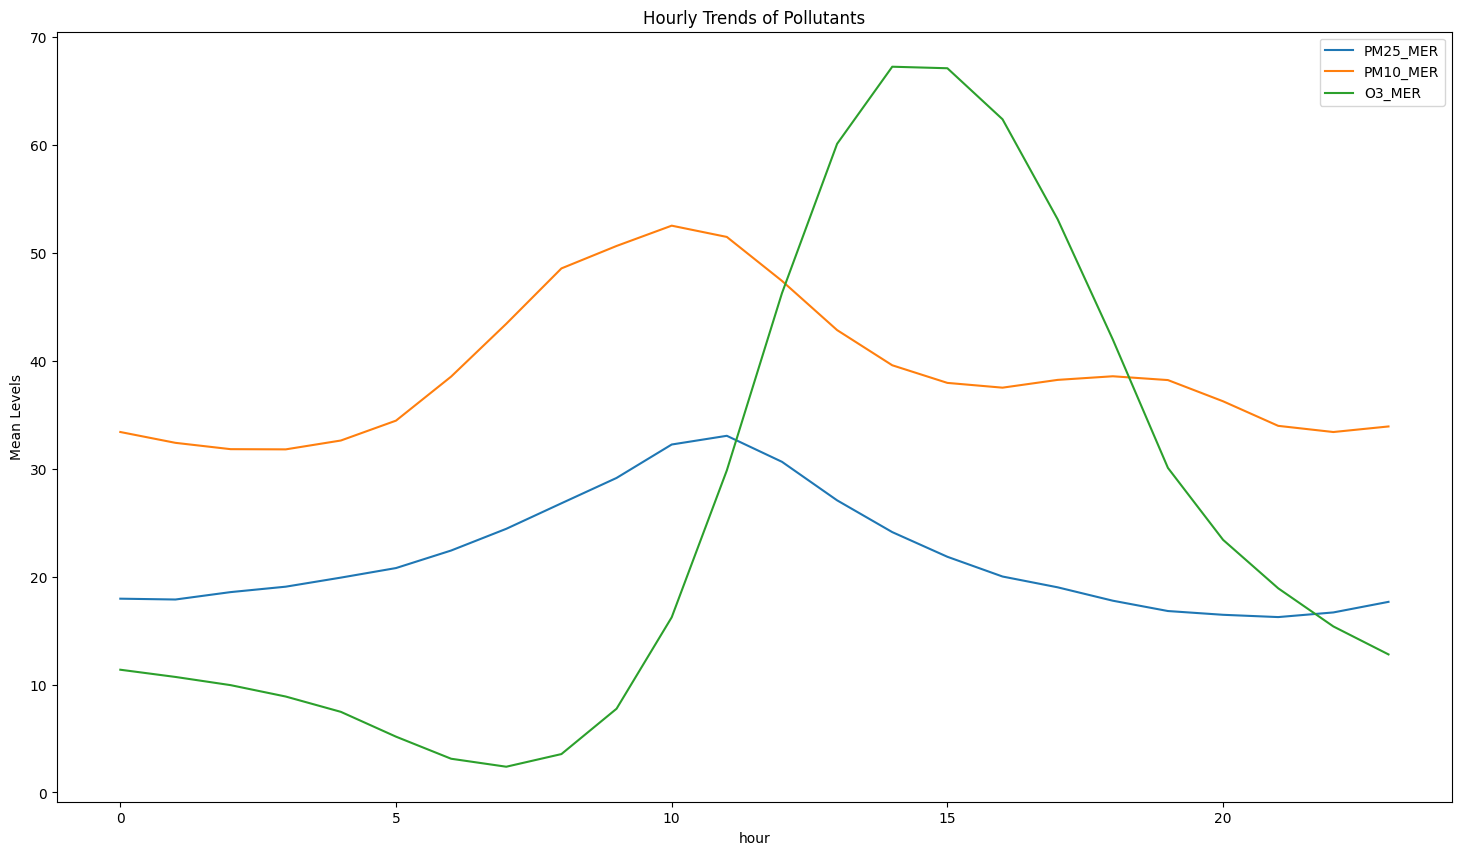

In [ ]:
focused_columns = ['PM25_MER', 'PM10_MER', 'O3_MER']
df = df[focused_columns + ['hour', 'Month', 'is_weekend', 'is_festival']]

hourly_means = df.groupby('hour')[focused_columns].mean()
hourly_means.plot(kind='line', figsize=(18, 10))
plt.title('Hourly Trends of Pollutants')
plt.ylabel('Mean Levels')
plt.show()

### **Observations**
1. **PM10 (Orange Line)**:
   - **Dominant Contributor**: PM10 exhibits the highest concentration levels throughout the day, peaking between **10:00 AM and 2:00 PM**.
   - **Consistent Rise and Fall**: It begins to rise gradually after midnight, peaks late morning, and then declines steadily in the evening.

2. **PM2.5 (Blue Line)**:
   - **Steady Increase**: PM2.5 levels show a gradual increase from early morning (around 2:00 AM), peaking slightly after noon.
   - **Lower Concentration**: Compared to PM10, PM2.5 remains at significantly lower levels but follows a similar trend.

3. **Ozone (O3) (Green Line)**:
   - **Distinct Peak**: Ozone levels exhibit a unique sharp rise around **11:00 AM** and peak near **12:00 PM to 1:00 PM**.
   - **Rapid Decline**: After the peak, O3 concentrations decrease rapidly in the afternoon and remain low in the evening and night.

---

### **Insights**
1. **Temporal Peaks**:
   - PM10 and PM2.5 concentrations increase gradually, likely due to human activities such as traffic and industrial emissions.
   - Ozone levels peak later in the morning and decline sharply, consistent with its dependence on sunlight for formation through photochemical reactions.

2. **Potential Sources**:
   - **PM10 and PM2.5**: Traffic emissions, industrial activities, and construction dust are likely contributors.
   - **Ozone (O3)**: Formation driven by sunlight interacting with precursors like nitrogen oxides (NOx) and volatile organic compounds (VOCs).

3. **Actionable Hours**:
   - The early morning (before 10:00 AM) and late evening (after 6:00 PM) show relatively lower pollution levels, which may be safer for outdoor activities.


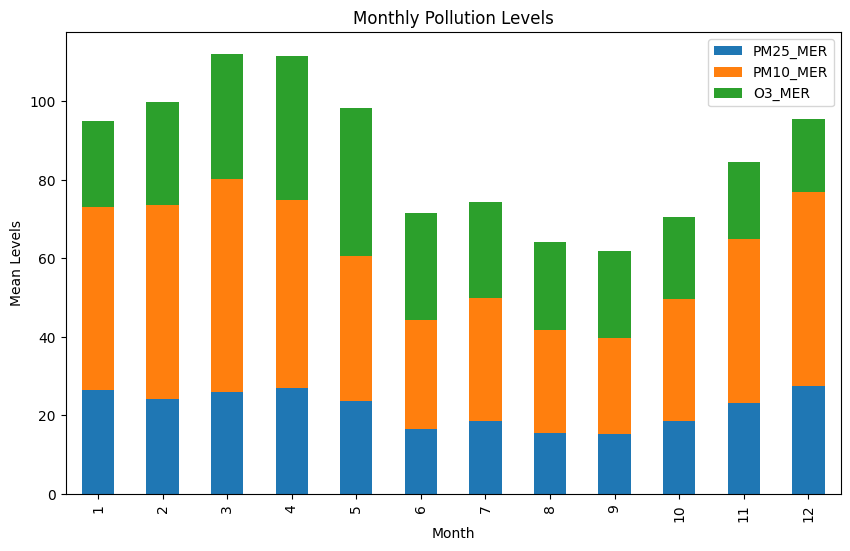

In [ ]:
monthly_means = df.groupby('Month')[focused_columns].mean()
monthly_means.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Monthly Pollution Levels')
plt.ylabel('Mean Levels')
plt.xlabel('Month')
plt.show()

Here’s an analysis based on the provided visualization:

---

## **Monthly Pollution Levels for PM2.5, PM10, and Ozone (O3)**

### **Objective**
The stacked bar chart presents the monthly mean pollution levels of **PM2.5**, **PM10**, and **O3**, enabling a comparative assessment of seasonal variations and contributions of each pollutant throughout the year.

---

### **Observations**
1. **Overall Trend**:
   - Pollution levels are higher during the first half of the year (**January to May**) compared to the latter half (**June to November**).
   - December marks another rise in pollution levels, reaching levels close to the peaks observed earlier in the year.

2. **PM10 (Orange Bar)**:
   - **Consistent Contribution**: PM10 is the dominant pollutant across all months, forming the largest segment in each bar.
   - **Peak Levels**: PM10 levels are highest from **March to May**, coinciding with seasonal changes and potentially increased dust or human activity.

3. **PM2.5 (Blue Bar)**:
   - **Steady Base Contribution**: PM2.5 remains relatively stable across the year, with no drastic fluctuations.
   - **Higher Levels**: The concentration of PM2.5 slightly increases during **March to May** and December, aligning with seasonal pollution surges.

4. **Ozone (O3) (Green Bar)**:
   - **Seasonal Dependence**: O3 levels are notably higher in **March, April, and May**, peaking in April, likely due to increased sunlight and photochemical reactions.
   - **Low Levels**: During **June to November**, ozone concentrations drop significantly, consistent with reduced solar intensity and precursor activity.

---

### **Insights**
1. **Seasonal Peaks**:
   - **March to May**: Represents the peak pollution period, with all three pollutants contributing significantly. This could be attributed to dry seasons, increased dust, and photochemical activities.
   - **December**: Another peak is observed, potentially due to wintertime pollution phenomena such as temperature inversions.

2. **Dominant Pollutants**:
   - PM10 is the primary contributor throughout the year, necessitating targeted strategies to reduce its sources, such as construction dust and industrial emissions.
   - Ozone levels, though seasonal, highlight the need to control precursor pollutants like NOx and VOCs during peak months.

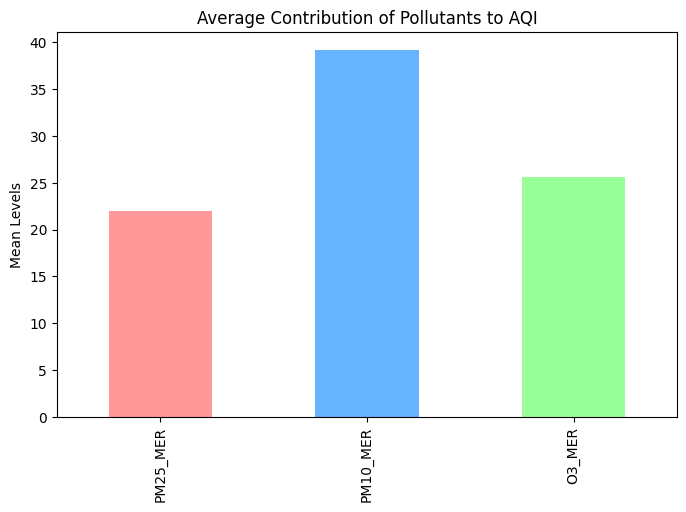

In [ ]:
mean_contributions = df[focused_columns].mean()
mean_contributions.plot(kind='bar', figsize=(8, 5), color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Average Contribution of Pollutants to AQI')
plt.ylabel('Mean Levels')
plt.show()

# Analysis Summary

#### **Trends in Air Pollutants**
- **PM2.5 and PM10**: These particulate matters show significant seasonal variation, with higher levels during colder months (e.g., December to February). PM2.5 peaked at 32.23 µg/m³ in November 2020 and fell to 12.18 µg/m³ in September 2022. PM10 also follows a similar trend, driven by heating activities and poor air dispersion in winter.
- **SO₂**: Consistently low levels, with occasional spikes
- **O₃**: Stable but increases slightly during warmer months.
- **NO₂**: Higher concentrations in winter.
- **CO**: Generally low but peaks during festivals, likely due to combustion-related activities.

#### **Meteorological Patterns**
- **Temperature**: Higher temperatures (e.g., 22.32°C in May 2022) reduce pollutant levels due to better dispersion. Lower temperatures (e.g., 15.80°C in January 2022) correlate with higher pollution levels.
- **Humidity**: High humidity in colder months exacerbates PM2.5 levels, while lower humidity in warmer months reduces it.
- **Wind**: Increased wind speeds in summer improve air quality by dispersing pollutants.


---

### **Key Relationships with AQI**
1. **PM2.5 and PM10**: Strong contributors to higher AQI levels, with progressive increases in concentration as air quality worsens. Outliers are observed during pollution spikes from industrial or natural events.
2. **SO₂**: Minor role in air quality degradation, with low median values across AQI levels.
3. **O₃**: High levels observed during warmer months and at higher AQI levels due to increased sunlight.
4. **NO₂**: Substantial contributor to AQI, driven by urban emissions like traffic and industries.
5. **CO**: Gradual increase in concentration with higher AQI, though its impact is less pronounced compared to particulates.

---

### **Impact of Festivals and Special Events**
- Pollutant levels (PM2.5, CO) show slight increases during festival seasons, indicating human activities like increased transportation and combustion during celebrations.

---

### **Correlations and Influences**
- **Positive Correlations**: PM2.5 and PM10, as well as PM2.5 and NO₂, show strong interrelationship.
- **Environmental Conditions**: Cold temperatures and high humidity worsen PM2.5 levels, indicating weather plays a critical role in air quality dynamics.

